# **Polynomial Regression on the Diabetes Dataset**

[Vist Github Page](https://github.com/imdarshik/CSCN8010-labs/tree/main/week3)

![California Housing Image](images/diab.jpg)

The goal of this report is to train and evaluate univariate linear regression models on a dataset related to houses in California, based on the 1990 census data. Specifically, we aim to predict the median house value using three independent variables: median income, population, and the number of households.

### **Getting the data**

The dataset used in this analysis is sourced from the second chapter of Aurélien Géron's book 'Hands-On Machine Learning with Scikit-Learn and TensorFlow.' The data pertains to California districts and includes information such as longitude, latitude, housing median age, total rooms, total bedrooms, population, households, median income, median house value, and ocean proximity.

[*Link to California Housing Prices Dataset*](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

In [184]:
# Importing pandas and the diabetes dataset from scikit-learn
import pandas as pd
from sklearn import datasets

# Loading the diabetes dataset with 'as_frame=True' to return the data as a pandas DataFrame
# Setting 'scaled=False' to keep the original feature scales, as we may need them for interpretation
data = datasets.load_diabetes(as_frame=True, scaled=False)

In [185]:
# Calling the 'keys()' method on the 'data' object to inspect available keys or attributes in the dataset.
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [186]:
# Extracting the 'data' attribute from the 'data' object and assigning it to the DataFrame 'df'.
# Adding a new column 'target' to 'df' and populating it with values from the 'target' attribute in the 'data' object.
df = data['data']
df['target'] = data['target']

In [187]:
# Display few samples
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0


In [188]:
# Data shape
print(df.shape)

(442, 11)


In [189]:
# Displaying concise information about the DataFrame 'df' using the 'info()' method.
# This helps identify the presence of missing values or null values in the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


### **Exploratory Data Analysis (EDA)**

In [190]:
# Explore statistics
df.describe().round(2)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00
mean,48.52,1.47,26.38,94.65,189.14,115.44,49.79,4.07,4.64,91.26,152.13
std,13.11,0.50,4.42,13.83,34.61,30.41,12.93,1.29,0.52,11.50,77.09
min,19.00,1.00,18.00,62.00,97.00,41.60,22.00,2.00,3.26,58.00,25.00
25%,38.25,1.00,23.20,84.00,164.25,96.05,40.25,3.00,4.28,83.25,87.00
50%,50.00,1.00,25.70,93.00,186.00,113.00,48.00,4.00,4.62,91.00,140.50
75%,59.00,2.00,29.28,105.00,209.75,134.50,57.75,5.00,5.00,98.00,211.50
max,79.00,2.00,42.20,133.00,301.00,242.40,99.00,9.09,6.11,124.00,346.00


Here are key insights from the data.describe() output for the diabetes dataset:

1. **Age Distribution:**
   - Patient ages range from 19 to 79, with an average age of around 48.52 years.
   - The age distribution indicates a diverse representation of patients across different age groups.

2. **Gender Distribution:**
   - The binary 'sex' column suggests a predominantly '1' population, with a mean value of 1.47.
   - Approximately more than 50% of patients are '1'.

3. **BMI (Body Mass Index):**
   - BMI values span from 18.00 to 42.20, with an average BMI of 26.38.
   - The distribution of BMI values provides insights into the weight status of the patients.

4. **Blood Pressure (bp):**
   - Blood pressure values range from 62.00 to 133.00, with an average value of 94.65.
   - Moderate variability in blood pressure is observed based on the interquartile range.

5. **Blood Serum Measurements (s1 to s6):**
   - These measurements exhibit varying means and standard deviations, reflecting diversity in blood serum levels among patients.

6. **Diabetes Progression (target):**
   - The target variable, representing diabetes progression one year after baseline, has values ranging from 25.00 to 346.00.
   - The extensive range of progression values suggests a diverse spectrum of diabetes severity present in the dataset.


In [192]:
# Importing plotting libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore all warnings during execution
import warnings
warnings.filterwarnings("ignore")

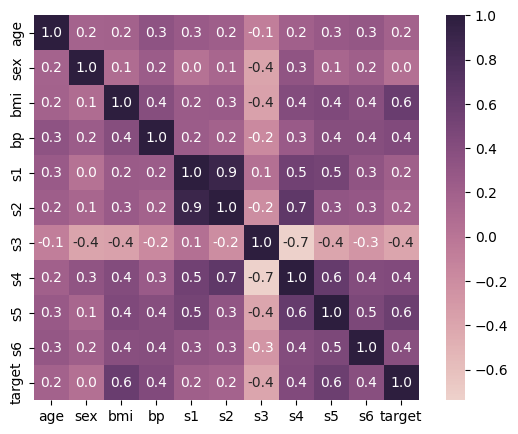

In [148]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(), annot=True, square=True, cmap=sns.cubehelix_palette(as_cmap=True),fmt=".1f")
plt.show()

Here are significant findings from the correlation matrix:

1. **BMI (Body Mass Index):**
   - BMI exhibits a strong positive correlation with diabetes progression (target) at 0.6. This indicates a notable association between BMI and the severity of diabetes progression.

2. **Blood Pressure (bp):**
   - Blood pressure (bp) shows a moderate positive correlation with diabetes progression (target) at 0.4. This suggests a potential connection between blood pressure levels and the progression of diabetes.

3. **Blood Serum Measurements:**
   - Strong positive correlations exist among blood serum measurements (s1 to s6), particularly between s1 and s2 (0.9). These correlations highlight strong interdependencies within the blood serum measurements.


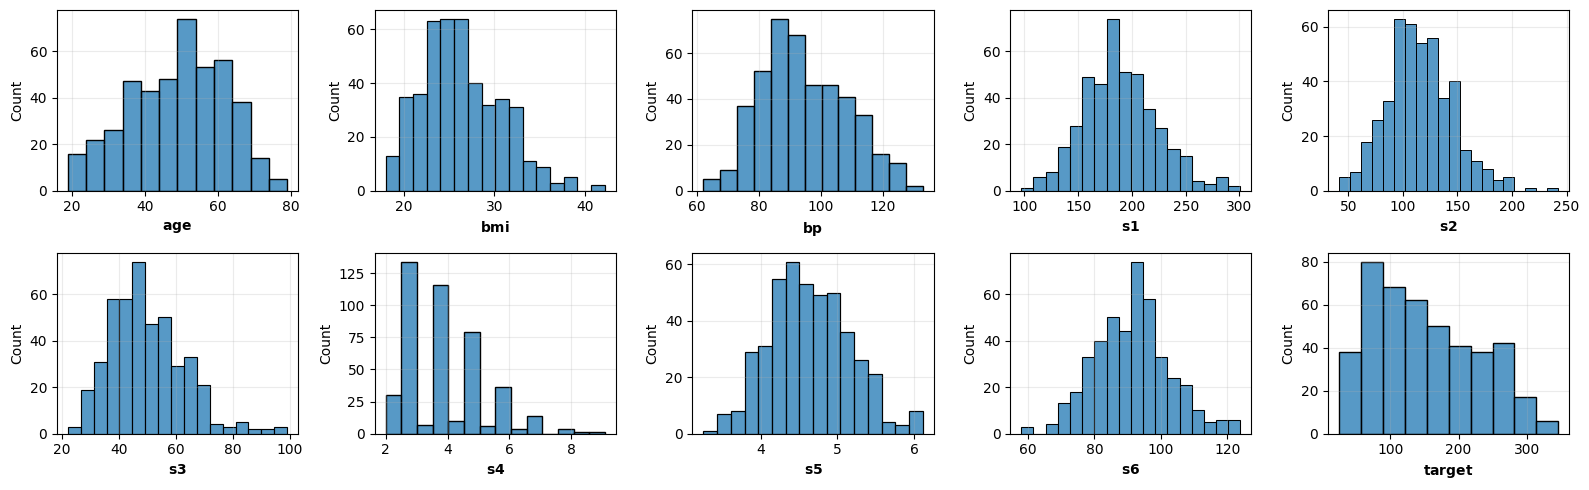

In [195]:
# Creating a histogram subplot grid to visualize the distribution of selected features and the target variable.
plt.figure(figsize=(16,5))

# Iterate over the selected columns for visualization
for i, col in enumerate(['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target']):
    plt.subplot(2,5,i+1)
    sns.histplot(df[col])
    plt.grid(alpha=0.25)
    plt.xlabel("$\\bf{"+col+"}$")
plt.tight_layout()
plt.show()

Upon reviewing the histogram plots in the grid, we observed that nearly all variables exhibit a normal distribution, except for s4, which shows a slight right skewness. This skewness in s4 could potentially be attributed to the presence of outliers.

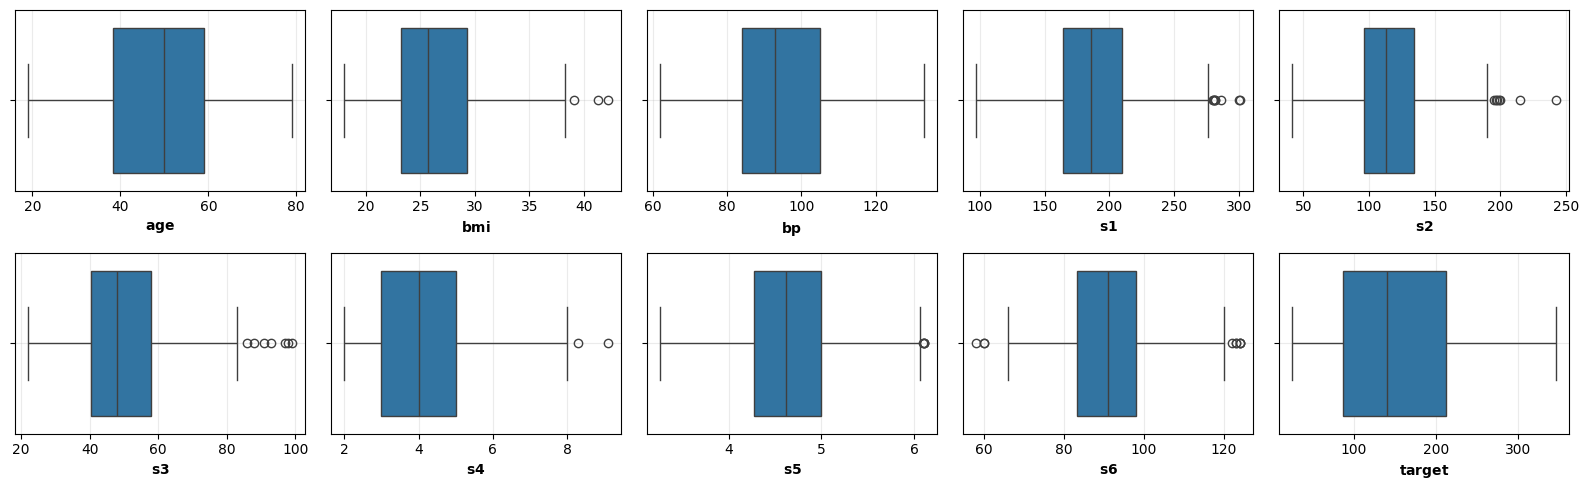

In [197]:
# Creating a boxplot subplot grid to visualize the distribution and detect potential outliers of selected features and the target variable.
plt.figure(figsize=(16,5))

# Iterate over the selected columns for visualization
for i, col in enumerate(['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target']):
    plt.subplot(2,5,i+1)
    sns.boxplot(x=df[col])
    plt.grid(alpha=0.25)
    plt.xlabel("$\\bf{"+col+"}$")
plt.tight_layout()
plt.show()


By examining the boxplots in the grid, we noticed a handful of outliers on the right side in BMI, s1, s2, s3, s4, and s5. Additionally, there are outliers on both the left and right sides of s6. While these outliers are present, they are considered meaningful and, therefore, should be retained in our analysis.

We focused on BMI for two main reasons. Firstly, it has a strong connection with how diabetes progresses in our dataset. This means changes in BMI are closely related to changes in diabetes. Secondly, we're following the instructions that suggest using BMI for modeling. This highlights that BMI is an important factor in predicting diabetes progression, aligning with what the instructions ask us to do.

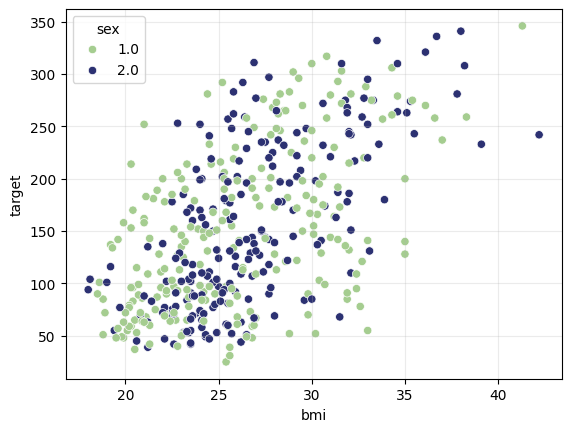

In [151]:
# Creating a scatterplot to visualize the relationship between BMI (Body Mass Index) and the target variable (diabetes progression).
sns.scatterplot(df, x="bmi", y="target", hue="sex", palette="crest")
plt.grid(alpha=0.25)
plt.show()

In the scatterplot, where BMI is plotted against the target variable representing diabetes progression, we observe a general upward trend, indicating a positive relationship. However, the spread of points is not perfectly aligned in a straight line. This means that while there is an overall tendency for higher BMI values to correspond to higher diabetes progression, individual data points show some variability around this trend. In other words, the scatterplot reflects a positive linear spread, but it's not perfect; there's some natural fluctuation in the data points.

In [198]:
# Importing necessary libraries for train-test split
from sklearn.model_selection import train_test_split

# Setting a seed for reproducibility
import random
random.seed(7)

# Extracting features (X) and target variable (y) for the model
X = df[['bmi','sex']]
y = df['target']

# Performing a three-way split for training (70%), validation (15%), and test (15%) sets using train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X[['bmi']], y, test_size=0.30, random_state=9, stratify=X["sex"])
X_val, X_test, y_val, y_test = train_test_split(X_temp[['bmi']], y_temp, test_size=0.50)

# Display dimensions of the data sets
print("Train size : ", X_train.shape)
print("Valid size : ", X_val.shape)
print("Test size  : ", X_test.shape)

Train size :  (309, 1)
Valid size :  (66, 1)
Test size  :  (67, 1)


### **Modeling: Linear Regression**

In [199]:
# Importing necessary libraries for polynomial regression and model evaluation
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_percentage_error, r2_score, mean_absolute_error

In [200]:
# Creating a pipeline for polynomial regression with PolynomialFeatures, StandardScaler, and LinearRegression
def create_model_pipeline(degree):
    # Define a pipeline with PolynomialFeatures, StandardScaler, and LinearRegression
    pipeline = Pipeline([
        ('poly_features', PolynomialFeatures(degree=degree)),
        ('scaler', StandardScaler()),
        ('linear_regression', LinearRegression())
    ])
    return pipeline

# List to store different polynomial regression models
model_list = []

# Dictionary to store regression results for analysis and comparison
model_results = {
    "DEGREE": [],
    "TRAIN MAE": [],
    "VALID MAE" : [],
    "TRAIN R2S" : [],
    "VALID R2S" : [],
    "TRAIN MAPE" : [],
    "VALID MAPE" : []
}

In [201]:
# Loop through different degrees for polynomial regression models
for degree in range(6):

    # Intialize models with various degree
    model = create_model_pipeline(degree)
    
    # Train model
    model.fit(X_train, y_train)
    
    # Save model to model list
    model_list.append(model)

    # Evaluate mdoel on train set
    y_pred_train = model.predict(X_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    r2s_train = r2_score(y_train, y_pred_train)
    map_train = mean_absolute_percentage_error(y_train, y_pred_train)

    # Evaluate model on validation set
    y_pred_val = model.predict(X_val)
    mae_val = mean_absolute_error(y_val, y_pred_val)
    r2s_val = r2_score(y_val, y_pred_val)
    map_val = mean_absolute_percentage_error(y_val, y_pred_val)

    # Display results
    print(f"DEGREE     : {degree}")
    print(f"TRAIN MAE  : {mae_train}")
    print(f"TRAIN R2S  : {r2s_train}")
    print(f"TRAIN MAPE : {map_train}")
    print(f"VALID MAE  : {mae_val}")
    print(f"VALID R2S  : {r2s_val}")
    print(f"VALID MAPE : {map_val}")
    print("\n")

    # Update the results dictionary
    model_results["DEGREE"].append(degree)
    model_results["TRAIN MAE"].append(mae_train)
    model_results["VALID MAE"].append(mae_val)
    model_results["TRAIN R2S"].append(r2s_train)
    model_results["VALID R2S"].append(r2s_val)
    model_results["TRAIN MAPE"].append(map_train)
    model_results["VALID MAPE"].append(map_val)


DEGREE     : 0
TRAIN MAE  : 64.96440129449839
TRAIN R2S  : 0.0
TRAIN MAPE : 0.6093896687512832
VALID MAE  : 69.15151515151516
VALID R2S  : -0.07650817677546673
VALID MAPE : 0.5443412675245991


DEGREE     : 1
TRAIN MAE  : 50.843424295449125
TRAIN R2S  : 0.3415770976567486
TRAIN MAPE : 0.4634133868406683
VALID MAE  : 56.67936567028842
VALID R2S  : 0.27708123458468736
VALID MAPE : 0.450199260865174


DEGREE     : 2
TRAIN MAE  : 50.84000540975526
TRAIN R2S  : 0.34169177170369713
TRAIN MAPE : 0.46350996089550645
VALID MAE  : 56.801154031278074
VALID R2S  : 0.2762795198778454
VALID MAPE : 0.4508516517136075


DEGREE     : 3
TRAIN MAE  : 50.40928901024264
TRAIN R2S  : 0.344071584791237
TRAIN MAPE : 0.45967316437967903
VALID MAE  : 57.24554184948429
VALID R2S  : 0.26382509280904753
VALID MAPE : 0.45079083507720247


DEGREE     : 4
TRAIN MAE  : 50.407529237437245
TRAIN R2S  : 0.3441025130155365
TRAIN MAPE : 0.4594166564933044
VALID MAE  : 57.19316026518106
VALID R2S  : 0.26500161756093055
VALI

### **Results Summary**

In [205]:
# Make data frame of the results dictionary
results = pd.DataFrame(model_results).round(4)
results

,DEGREE,TRAIN MAE,VALID MAE,TRAIN R2S,VALID R2S,TRAIN MAPE,VALID MAPE
0,0,64.9644,69.1515,0.0000,-0.0765,0.6094,0.5443
1,1,50.8434,56.6794,0.3416,0.2771,0.4634,0.4502
2,2,50.8400,56.8012,0.3417,0.2763,0.4635,0.4509
3,3,50.4093,57.2455,0.3441,0.2638,0.4597,0.4508
4,4,50.4075,57.1932,0.3441,0.2650,0.4594,0.4504
5,5,50.2362,56.4095,0.3490,0.2758,0.4575,0.4447


### **Regression Lines**

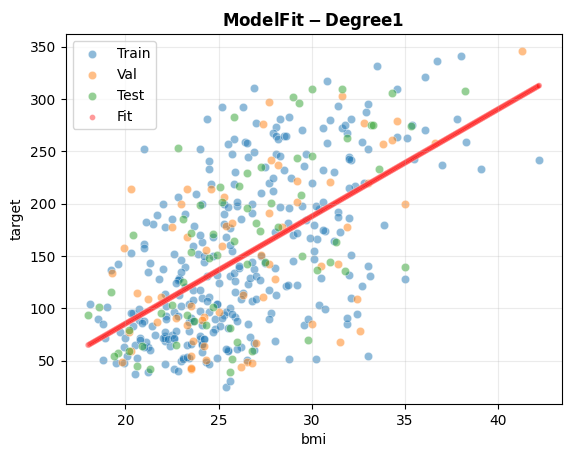

In [183]:
import numpy as np

sns.scatterplot(x=X_train["bmi"], y=y_train, alpha=0.5)
sns.scatterplot(x=X_val["bmi"], y=y_val, alpha=0.5)
sns.scatterplot(x=X_test["bmi"], y=y_test, alpha=0.5)
x_range = np.linspace(df['bmi'].min(), df['bmi'].max(),len (df['bmi']))
sns.scatterplot(x=x_range, y=model_list[1].predict(x_range.reshape(-1,1)),size=1, alpha=0.4, color="red")
plt.title("$\\bf{Model Fit - Degree 1}$")
plt.legend(["Train", "Val", "Test", "Fit"])
plt.grid(alpha=0.25)
plt.show()

### **Conclusion**

In [ ]:
# !jupyter nbconvert --to html Practical_lab3.ipynb